## Example 1: Explore Degenerate System

Here we will explore inference when there is not a single unique set of parameters.

In [1]:
import sys
import os

# Add repo root to Python path (one level up from examples/)
sys.path.append(os.path.abspath(".."))  

from src.parsing import *
from CRN_Simulation.CRN import CRN

import numpy as np
import random

In [2]:
# Determine Stochiometric, Reactant and names of reactions
species_names = ["X1", "X2"]

# Define complexes (example: bi-molecular)
complexes = np.array([[0, 0, 0, 1, 1, 2],
                      [0, 1, 2, 0, 1, 0]])

reactant_matrix, product_matrix, stoichiometric_matrix, reaction_names, parameter_names = generate_reactions(complexes, species_names)
print(f"Total reactions generated: {len(reaction_names)}")
print("Some reaction names:", reaction_names[:5])

Total reactions generated: 30
Some reaction names: ['Empty_to_X2:', 'Empty_to_2X2:', 'Empty_to_X1:', 'Empty_to_X1+X2:', 'Empty_to_2X1:']


In [3]:
############################
# Set up Reaction System 1 #
############################

reactions_sys1 = ["X1_to_X2", "X2_to_X1"]
rates_sys1 = [1.0, 1.0]  # X1_to_X2, X2_to_X1


############################
# Set up Reaction System 2 #
############################
reactions_sys2 = ["2X1_to_X1+X2", "X1+X2_to_2X1","X1+X2_to_2X2","2X2_to_X1+X2"]
rates_sys2     = [1.0, 1.0, 1.0, 2,0]  


In [4]:
############################
# Generate CRN System 1
############################
(CRN1_stoichiometric_matrix,
 CRN1_reaction_names,
 CRN1_parameter_names,
 CRN1_propensities,
 CRN1_parameter_values,
 CRN1_indices) = build_subCRN_from_names(
    reactant_matrix,
    product_matrix,
    stoichiometric_matrix,
    reaction_names,
    parameter_names,
    species_names,
    selected_names=reactions_sys1,
    rates=rates_sys1
)

rn1 = CRN(
    species_names=species_names,
    stoichiometric_matrix=CRN1_stoichiometric_matrix,
    parameters_names=CRN1_parameter_names,
    reaction_names=CRN1_reaction_names,
    propensities=CRN1_propensities
)

print("CRN1 created.")
print("Reaction indices:", CRN1_indices)
print("Parameter values:", CRN1_parameter_values)


############################
# Generate CRN System 2
############################
(CRN2_stoichiometric_matrix,
 CRN2_reaction_names,
 CRN2_parameter_names,
 CRN2_propensities,
 CRN2_parameter_values,
 CRN2_indices) = build_subCRN_from_names(
    reactant_matrix,
    product_matrix,
    stoichiometric_matrix,
    reaction_names,
    parameter_names,
    species_names,
    selected_names=reactions_sys2,
    rates=rates_sys2
)

rn2 = CRN(
    species_names=species_names,
    stoichiometric_matrix=CRN2_stoichiometric_matrix,
    parameters_names=CRN2_parameter_names,
    reaction_names=CRN2_reaction_names,
    propensities=CRN2_propensities
)

print("CRN2 created.")
print("Reaction indices:", CRN2_indices)
print("Parameter values:", CRN2_parameter_values)


CRN1 created.
Reaction indices: [16, 7]
Parameter values: {'k16': 1.0, 'k7': 1.0}
CRN2 created.
Reaction indices: [29, 24, 22, 13]
Parameter values: {'k29': 1.0, 'k24': 1.0, 'k22': 1.0, 'k13': 2}


Initial state: {'X1': np.int64(1), 'X2': np.int64(1)}
Trajectory saved to ../data/example1_crn1_trajectory.json
CRN1 trajectory saved to ../data/example1_crn1_trajectory.json
Initial state: {'X1': np.int64(1), 'X2': np.int64(1)}
Trajectory saved to ../data/example2_crn2_trajectory.json
CRN2 trajectory saved to ../data/example2_crn2_trajectory.json


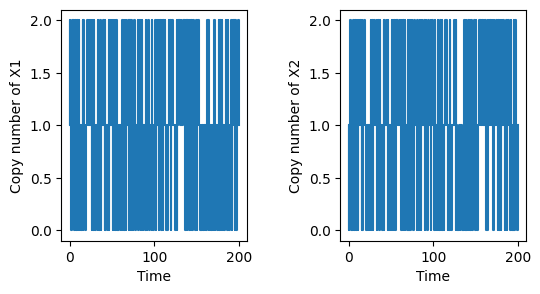

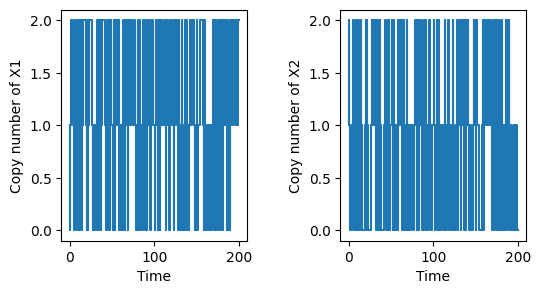

In [5]:
data_dir = "../data"  # relative to examples/ folder
os.makedirs(data_dir, exist_ok=True)

############################
# Generate trajectory for CRN1
############################
time_list1, state_list1 = generate_single_trajectory(
    rn1,
    CRN1_parameter_values,
    species_names,
    finalTime=200,   # adjust as needed
    minVal=1,
    maxVal=1,
    seed=42          # for reproducibility
)

trajectory_file1 = os.path.join(data_dir, "example1_crn1_trajectory.json")
save_trajectory(time_list1, state_list1, filename=trajectory_file1)
print(f"CRN1 trajectory saved to {trajectory_file1}")


############################
# Generate trajectory for CRN2
############################
time_list2, state_list2 = generate_single_trajectory(
    rn2,
    CRN2_parameter_values,
    species_names,
    finalTime=200,   # adjust as needed
    minVal=1,
    maxVal=1,
    seed=42          # reproducibility
)

trajectory_file2 = os.path.join(data_dir, "example2_crn2_trajectory.json")
save_trajectory(time_list2, state_list2, filename=trajectory_file2)
print(f"CRN2 trajectory saved to {trajectory_file2}")


In [6]:
# Parse trajectory for CRN1
[col_dict1, XCurrKeys1, X_Counts1, T_Vals1, X_Propensities1] = \
    calc_XCurr_ChangeTimePropensitySimple(
        state_list1,
        time_list1,
        reactant_matrix,
        stoichiometric_matrix
    )

# Parse trajectory for CRN2
[col_dict2, XCurrKeys2, X_Counts2, T_Vals2, X_Propensities2] = \
    calc_XCurr_ChangeTimePropensitySimple(
        state_list2,
        time_list2,
        reactant_matrix,
        stoichiometric_matrix
    )

# Print some basic info to check
print(f"CRN1: {len(XCurrKeys1)} unique states observed")
print(f"CRN2: {len(XCurrKeys2)} unique states observed")


Wrapped single trajectory into list of trajectories.
Tracking data for 18 unique stoichiometric changes
Processing trajectory 1 of 1
	Processing state 0 of 365
Finished processing states. Computing propensities...
	Processing propensities for state 0 = (1, 1)
Finished successfully.
Wrapped single trajectory into list of trajectories.
Tracking data for 18 unique stoichiometric changes
Processing trajectory 1 of 1
	Processing state 0 of 302
Finished processing states. Computing propensities...
	Processing propensities for state 0 = (1, 1)
Finished successfully.
CRN1: 3 unique states observed
CRN2: 3 unique states observed


In [7]:
XCurrKeys1

[(1, 1), (2, 0), (0, 2)]

In [8]:
XCurrKeys2

[(1, 1), (0, 2), (2, 0)]